<a href="https://colab.research.google.com/github/LathaGovindarajan/Machine-Learning/blob/main/RNN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Activation,SimpleRNN
from keras.utils import to_categorical,plot_model
from keras.datasets import mnist

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [ ]:
#computr the num labels
num_labels=len(np.unique(y_train))

In [ ]:
print(num_labels)

10


In [ ]:
#convert to one hot vector
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
#resize and normalize
image_size=x_train.shape[1]
x_train=np.reshape(x_train,[-1,image_size,image_size])
print(x_train.shape)

(60000, 28, 28)


In [ ]:
x_test=np.reshape(x_test,[-1,image_size,image_size])
print(x_test.shape)

(10000, 28, 28)


In [ ]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
#network parameters
input_shape=(image_size,image_size)
batch_size=128
units=28
dropout=0.2

In [ ]:
#moidel is RNN with 256 units input is 28-dim vector 28 timesteps
model=Sequential()
model.add(SimpleRNN(units=units,input_shape=input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 28)                1596      
                                                                 
 dense (Dense)               (None, 10)                290       
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
Total params: 1,886
Trainable params: 1,886
Non-trainable params: 0
_________________________________________________________________


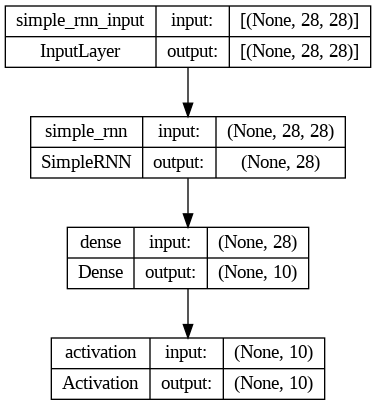

In [ ]:
plot_model(model,to_file='rnn-mnist.png',show_shapes=True)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.9519 - accuracy: 0.6885
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.5535 - accuracy: 0.8321
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4399 - accuracy: 0.8709
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3778 - accuracy: 0.8910
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3299 - accuracy: 0.9061
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2981 - accuracy: 0.9166
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2742 - accuracy: 0.9226
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2596 - accuracy: 0.9278
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2447 - accuracy: 0.9307
Epoch 10/10
1875/1875 [==============================] - 12s 7ms/step - 